<a href="https://colab.research.google.com/github/RamanGupta16/ML/blob/master/EVA_Ph1/Session4/Session4_2nd_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Session4 2nd DNN
# Modification on top of 1st DNN 
# 1. Increased epochs to 20
# 2. Increased batch size to 128

# Reduced parameters to 19,042

# RESULTS SUMMARY
# Parameters: 19,042
# 99.26 best validation accuracy in epoch 7

In [0]:
# Comments:
# Install keras onto colab VM 
# Import numpy package
# Import keras models, layers, convolution, dropout
# Import MNIST dataset
#

# https://keras.io/
!pip install -q keras

import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(60000, 28, 28)


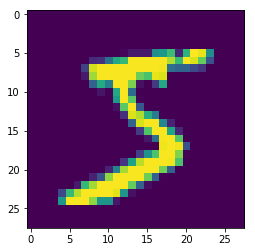

In [24]:
# Comments:
# 1. Load MNIST dataset. It loads both Training and Test datasets
# 2. Training set has 60,000 image samples. X_train are images and y_train is label of images
# 3. Test set of 10,000 image samples. y_test are images and y_train is label of images
# 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Comments:
# 1. Training set has 60,000 image samples of size 28x28 pixels
# 2. Show '5' hand written digit image
#
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Comments:
# 1. Reshape the 60,000 training data with channel dimenison as 1. So each image is 28x28x1 dimension
# 2. Reshape the 10,000 test data with channel dimenison as 1. So each image is 28x28x1 dimension
#

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Comments:
# 1. Divide training data by 255 so that pixels become float values betwee 0..1
# 2. Divide test data by 255 so that pixels become float values betwee 0..1
#

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
# Comments:
# 1. Print the first 10 labels of training data
#
y_train[:10]

# Comments:
# 1. Convert 1-dimensional train and test labels into one-hot vector of floats
#    where only 1 value in vector is high(hot) indicating the label of image.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Comments:
# 1. Print the first 10 training label as one-hot vectors.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Comments:
# 1. Create the model
# 2. Add convolution Layers


from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x16, 3x3
model.add(Convolution2D(16, 3, 3, activation='relu')) #  24x24x32, 5x5
model.add(Convolution2D(32, 3, 3, activation='relu')) #  22x22x128, 7x7


model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x128, 14x14
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11x11x32, 14x14


model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9x64, 16x16
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7x7x128, 18x18

model.add(Convolution2D(8, 1, 1, activation='relu')) # 7x7x32, 18x18

model.add(Convolution2D(16, 3, 3, activation='relu')) # 5x5, 20x20
model.add(Convolution2D(24, 3, 3, activation='relu')) # 3x3, 22x22

model.add(Convolution2D(10, 3, 3)) # 1x1x10, 24x24

model.add(Flatten())
model.add(Activation('softmax'))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 32)          4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarnin

In [0]:
# Comment
# 1. Compile the model and define loss function, optimization and metrics to measure the prediction

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
# Comments:
# 1. Train the model for 10 epochs with 32 batch size

model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 1792/60000 [..............................] - ETA: 5s - loss: 0.0039 - acc: 0.9983

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 7s 123us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0430 - val_acc: 0.9919
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 5.1517e-04 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9922
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 3.1889e-04 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 0.9926
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 2.9495e-04 - acc: 1.0000 - val_loss: 0.0471 - val_acc: 0.9925
Epoch 5/20
60000/60000 [==============================] - 8s 129us/step - loss: 2.8738e-04 - acc: 1.0000 - val_loss: 0.0484 - val_acc: 0.9924
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 2.8250e-04 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 0.9925
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 2.7927e-04 - acc: 1.0000 - val_loss: 0.0502 - val_acc: 0.9926
Epoch 8/20
60000/6000

In [33]:
# Comments:
# 1. Evaluate the trained model on test dataset
# 2. Print evaluated validation accuracy score.

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.060848190201219336, 0.9924]


In [0]:
# Comments:
# 1. Generate the predictions for the test dataset.
# 2. These predictions are in 1-hot vector format
#

y_pred = model.predict(X_test)

In [35]:
# Comments:
# 1. Print the first 9 Predictions
# 2. Only prediction for digit 4 are correct rest are wrong.
# 3. Correct predictions for digit 4:
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#

print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 1.3396243e-37 4.4522244e-31 1.1911587e-23 0.0000000e+00
  2.7169431e-31 0.0000000e+00 1.0000000e+00 1.2838715e-33 8.6175683e-26]
 [1.5960272e-38 9.3242678e-37 1.0000000e+00 2.2408482e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.4902383e-29 0.0000000e+00]
 [2.7118962e-34 1.0000000e+00 3.8643713e-30 1.2188497e-28 3.2424319e-21
  3.6063887e-23 9.6936948e-32 2.4260199e-25 4.3236792e-24 4.2466436e-30]
 [1.0000000e+00 0.0000000e+00 3.3275630e-37 1.4429556e-26 2.9329241e-38
  5.0007359e-22 1.2316960e-17 5.7077368e-35 1.4846216e-24 2.0013601e-33]
 [0.0000000e+00 9.9104547e-38 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 3.5127608e-35 3.5552069e-38 3.8340896e-32]
 [7.8970242e-38 1.0000000e+00 1.9944440e-29 2.6204106e-34 9.5253686e-17
  1.7460733e-22 8.6050973e-31 5.7339304e-18 1.3418261e-18 1.1432935e-26]
 [0.0000000e+00 1.2064170e-33 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.2545575e-24 2.3450837e-31 

In [36]:
# Comment
# Create Layer dictionary

layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_21': <keras.layers.convolutional.Conv2D object at 0x7f1be9cd95c0>, 'conv2d_22': <keras.layers.convolutional.Conv2D object at 0x7f1be9cd9588>, 'conv2d_23': <keras.layers.convolutional.Conv2D object at 0x7f1be9cd9828>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0x7f1be9c81978>, 'conv2d_24': <keras.layers.convolutional.Conv2D object at 0x7f1be9cd9940>, 'conv2d_25': <keras.layers.convolutional.Conv2D object at 0x7f1be9c81278>, 'conv2d_26': <keras.layers.convolutional.Conv2D object at 0x7f1be9c9aa20>, 'conv2d_27': <keras.layers.convolutional.Conv2D object at 0x7f1be9cad400>, 'conv2d_28': <keras.layers.convolutional.Conv2D object at 0x7f1be9c43358>, 'conv2d_29': <keras.layers.convolutional.Conv2D object at 0x7f1be9c5ca90>, 'conv2d_30': <keras.layers.convolutional.Conv2D object at 0x7f1be9c06358>, 'flatten_3': <keras.layers.core.Flatten object at 0x7f1be9bccc50>, 'activation_3': <keras.layers.core.Activation object at 0x7f1be9bf7128>}


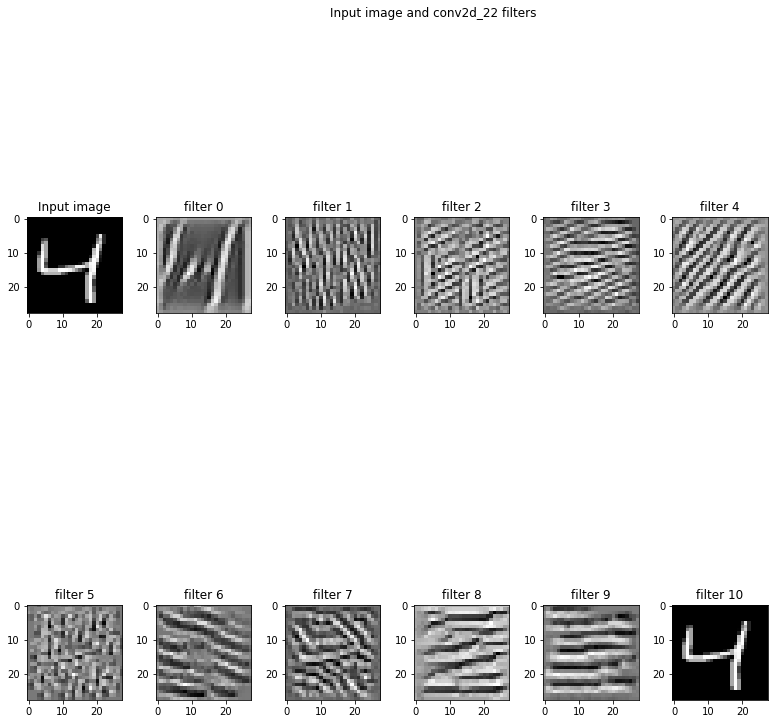

In [38]:
# Comment
# Visualize image in filter

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_22'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()